In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/PW/Semestr 4/ML/Projekt 1/data/learning_data.csv")

## **Preprocessing danych**

In [3]:
df.head(5)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Corcoran West Side,Co-op for sale,415000,3,1.0,2184.207862,233 E 70th St Apt 6R,"New York, NY 10021","233 E 70th St Apt 6RNew York, NY 10021",New York,New York County,New York,Manhattan,233,"233 E 70th St #6r, New York, NY 10021, USA",40.767820,-73.959425
1,Brokered by Douglas Elliman - Roslyn,Multi-family home for sale,1699000,5,5.0,2184.207862,42-11 Astoria Blvd N,"Astoria, NY 11105","42-11 Astoria Blvd NAstoria, NY 11105",United States,New York,Queens County,Queens,Astoria Boulevard North,"42-11 Astoria Blvd N, Astoria, NY 11105, USA",40.769148,-73.907370
2,Brokered by EXP Realty,Condo for sale,675000,2,2.0,904.000000,92-29 Queens Blvd Unit 7H116,"Rego Park, NY 11374","92-29 Queens Blvd Unit 7H116Rego Park, NY 11374",United States,New York,Queens County,Queens,Queens Boulevard,"92-29 Queens Blvd, Rego Park, NY 11374, USA",40.732471,-73.867080
3,Brokered by Momentum Real Estate LLC,Multi-family home for sale,850000,3,2.0,1696.000000,213 Liberty Ave,"Staten Island, NY 10305","213 Liberty AveStaten Island, NY 10305",United States,New York,Richmond County,Staten Island,Liberty Avenue,"213 Liberty Ave, Staten Island, NY 10305, USA",40.587072,-74.094436
4,Brokered by COMPASS,Co-op for sale,825000,2,1.0,2184.207862,250 W 103rd St Apt 7D,"Manhattan, NY 10025","250 W 103rd St Apt 7DManhattan, NY 10025",New York,New York County,New York,Manhattan,250,"250 W 103rd St Apt 7b, New York, NY 10025, USA",40.799157,-73.969032


In [4]:
df['ZIPCODE'] = df["STATE"].str.extract(r'(\b\d{5}\b)')

In [5]:
df['ZIPCODE'].describe()

count      3360
unique      175
top       11375
freq         72
Name: ZIPCODE, dtype: object

In [6]:
df['ZIPCODE'].value_counts()

11375    72
11235    67
11234    66
10463    65
10314    59
         ..
10006     2
10282     1
10475     1
11693     1
10455     1
Name: ZIPCODE, Length: 175, dtype: int64

In [7]:
df['ZIPCODE'].isnull().sum()

0

In [8]:
df_prep = df[['BEDS', 'BATH', 'PROPERTYSQFT', 'ZIPCODE', 'SUBLOCALITY', 'BROKERTITLE', 'TYPE', 'PRICE', 'LATITUDE', 'LONGITUDE']]
df_prep.head(5)

,BEDS,BATH,PROPERTYSQFT,ZIPCODE,SUBLOCALITY,BROKERTITLE,TYPE,PRICE,LATITUDE,LONGITUDE
0,3,1.0,2184.207862,10021,New York,Brokered by Corcoran West Side,Co-op for sale,415000,40.767820,-73.959425
1,5,5.0,2184.207862,11105,Queens County,Brokered by Douglas Elliman - Roslyn,Multi-family home for sale,1699000,40.769148,-73.907370
2,2,2.0,904.000000,11374,Queens County,Brokered by EXP Realty,Condo for sale,675000,40.732471,-73.867080
3,3,2.0,1696.000000,10305,Richmond County,Brokered by Momentum Real Estate LLC,Multi-family home for sale,850000,40.587072,-74.094436
4,2,1.0,2184.207862,10025,New York,Brokered by COMPASS,Co-op for sale,825000,40.799157,-73.969032


### Dane liczbowe

Usuńmy outliery z Price, gdzie rozkład jest zbliżony do normalnego (zasada 3 $\sigma$)

In [9]:
df_prep['PRICE_LOG'] = np.log1p(df_prep['PRICE'])
print(f'Przed: { df.shape[0]}')
mean_pr = df_prep['PRICE_LOG'].mean()
std_pr = df_prep['PRICE_LOG'].std()
lower = mean_pr - 3 * std_pr
upper = mean_pr + 3 * std_pr
df_prep = df_prep[(df_prep['PRICE_LOG'] >= lower) & (df_prep['PRICE_LOG'] <= upper)]
print(f'Po: { df_prep.shape[0]}')

Przed: 3360
Po: 3324


Usuwamy outliery ze zmiennych BEDS i BATH

In [10]:
print('Wejściowy rozmiar: ', df_prep.shape[0])

upper_lim = df_prep['BEDS'].quantile(0.95)
df_prep = df_prep[(df_prep['BEDS'] <= upper_lim)]

print('Wyjściowy rozmiar: ', df_prep.shape[0])

Wejściowy rozmiar:  3324
Wyjściowy rozmiar:  3181


In [11]:
print('Wejściowy rozmiar: ', df_prep.shape[0])

upper_lim = df_prep['BATH'].quantile(0.95)
df_prep = df_prep[(df_prep['BATH'] <= upper_lim)]

print('Wyjściowy rozmiar: ', df_prep.shape[0])

Wejściowy rozmiar:  3181
Wyjściowy rozmiar:  3048


In [12]:
print(f'Przed: { df_prep.shape[0]}')

mean_pr = df_prep['PROPERTYSQFT'].mean()
std_pr = df_prep['PROPERTYSQFT'].std()
upper = mean_pr + 3 * std_pr
df_prep = df_prep[(df['PROPERTYSQFT'] <= upper) ]
print(f'Po: { df_prep.shape[0]}') 

Przed: 3048
Po: 3038


In [13]:
df_prep['SQFT_LOG'] = np.log10(df_prep['PROPERTYSQFT'])

Dane po usunięciu outlierów i transformacji danych

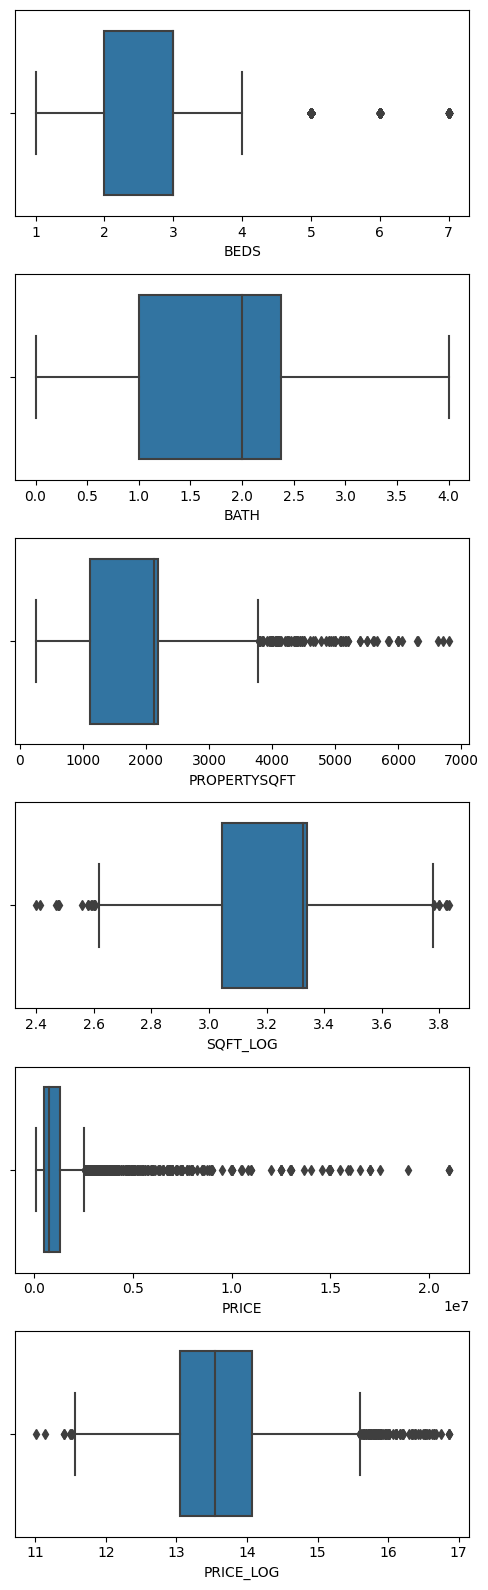

In [14]:
fig, axes = plt.subplots(6, 1, figsize= (5, 16))
axes = axes.flatten()

for i, col in enumerate(["BEDS", "BATH", "PROPERTYSQFT", "SQFT_LOG", "PRICE", "PRICE_LOG"]):
    sns.boxplot(df_prep, x= (df_prep[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

<AxesSubplot: >

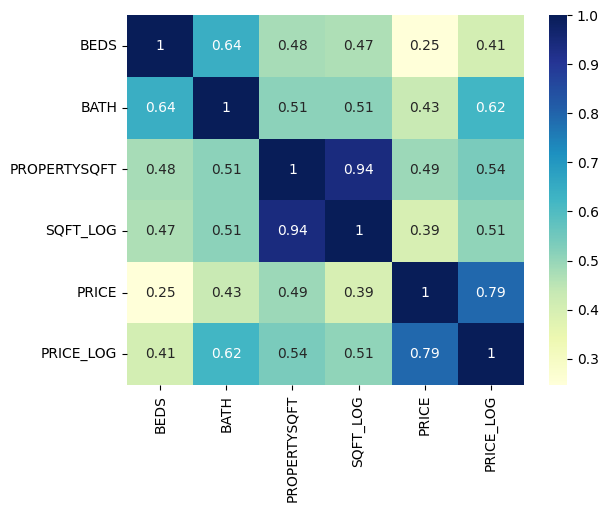

In [15]:
sns.heatmap(df_prep[["BEDS", "BATH", "PROPERTYSQFT", "SQFT_LOG", "PRICE", "PRICE_LOG"]].corr(), annot=True, cmap="YlGnBu")

In [16]:
df_prep_2 = df_prep[['BEDS', 'BATH', 'SQFT_LOG', 'ZIPCODE', 'SUBLOCALITY', 'BROKERTITLE', 'TYPE', 'PRICE_LOG','LATITUDE', 'LONGITUDE']]

### Dane kategoryczne

In [17]:
cat = ["ZIPCODE", "SUBLOCALITY", "BROKERTITLE", "TYPE"]

for col in cat:
    df_tmp = df_prep_2[col].value_counts()
    print(df_tmp)
    
    df_tmp = df_tmp.reset_index()
    df_tmp.columns = [col, "count"]
    print(f'Liczba {col} występujących jednokrotnie:', df_tmp[df_tmp['count'] == 1].shape[0])
    print(end= "________________________________________________________________\n")

11375    72
11235    64
10463    64
11234    62
10314    59
         ..
10474     1
11433     1
10454     1
11693     1
10459     1
Name: ZIPCODE, Length: 175, dtype: int64
Liczba ZIPCODE występujących jednokrotnie: 8
________________________________________________________________
New York           697
Kings County       425
Queens County      423
Queens             389
Richmond County    311
Brooklyn           306
Bronx County       174
The Bronx          129
New York County    113
Staten Island       40
Manhattan           17
Flushing             4
Riverdale            4
Coney Island         3
Snyder Avenue        1
Jackson Heights      1
Fort Hamilton        1
Name: SUBLOCALITY, dtype: int64
Liczba SUBLOCALITY występujących jednokrotnie: 3
________________________________________________________________
Brokered by COMPASS                                             287
Brokered by Douglas Elliman - 575 Madison Ave                    71
Brokered by Brown Harris Stevens            

Grupujemy pojedyńczo występujących pośredników w kategorię "Other"

In [18]:
df_prep_2["BROKERTITLE"] = df_prep_2["BROKERTITLE"].str.replace("Brokered by ", "")
small_brokers = df_prep_2["BROKERTITLE"].value_counts()[df_prep_2['BROKERTITLE'].value_counts() == 1].index
small_brokers

Index(['Master Associates Inc.', 'Project Queens LLC',
       'GOOD WAY PROPERTIES, CORP.', 'Real Estate Top Sales Llc',
       'Best Find Realty', 'Garden Square Realty', 'Epiphany Realty Llc',
       'Julia Shildkret Real Estate', 'Dawning Real Estate, Inc.',
       'Community Home Sales Inc',
       ...
       'Tri State Han Mi Realty Inc', 'Vantage Realty Partners',
       'Annkey Realty, Inc.', 'Skylux Realty', 'Hall Homes Realty, Inc.',
       'Nyc Elite Homes Inc', 'Jm Properties', 'Grandeur Realty, Inc.',
       'Belle Maison Realty Inc',
       'Rising Star Realty and Property Management, Inc.'],
      dtype='object', length=438)

In [19]:
df_prep_2["BROKERTITLE"] = np.where(df_prep_2["BROKERTITLE"].isin(small_brokers), 'Other', df_prep_2["BROKERTITLE"])
df_prep_2["BROKERTITLE"].value_counts()

Other                                     438
COMPASS                                   287
Douglas Elliman - 575 Madison Ave          71
Brown Harris Stevens                       60
Corcoran East Side                         53
                                         ... 
Fillmore Real Estate Fusion Team, INC.      2
Keller Williams Points North                2
Nexthome All Island                         2
Soverign Homes Realty Inc                   2
H P Greenfield Real Estate Ltd              2
Name: BROKERTITLE, Length: 372, dtype: int64

Ponieważ typ "Coming Soon" nie niesie ze sobą żadnej informacji apropo typu nieruchomości postanowiliśmy usunąć tę obserwację. \
"Mobile house for sale" był w naszej opinii na tyle niezwykłym typem nieruchomości, że również został usunięty ze względu na mały wpływ na uczenie się modelu. \
Dodatkowo oba typy wystąpiły jednokrotnie, co tym bardziej nie ma wpływu na trening.

In [20]:
df_prep_2.drop(labels= df_prep_2[df_prep_2["TYPE"].isin(["Coming Soon", "Mobile house for sale"])].index ,axis=0, inplace=True)
df_prep_2["TYPE"].value_counts()

Co-op for sale                993
House for sale                664
Condo for sale                616
Multi-family home for sale    344
Pending                       161
Townhouse for sale            148
Contingent                     60
Land for sale                  33
For sale                        8
Foreclosure                     7
Condop for sale                 2
Name: TYPE, dtype: int64

Postanowiliśmy zostawić pojedyńcze obserwacje w kategoriach ZIPCODE oraz SUBLOCALITY, ponieważ w naszej opinii nawet pojedyńcze obserwacje zawierają jakąś informację dotyczącą danej dzielnicy/ulicy w mieście zwłaszcza, że te kolumny zawierają stosunkowo dokładne dane o lokalizacji danej nieruchomości.

## Kodowanie zmiennych kategorycznych

In [21]:
df_proccessed = df_prep_2.reset_index(drop=True)
df_proccessed.head(10)

,BEDS,BATH,SQFT_LOG,ZIPCODE,SUBLOCALITY,BROKERTITLE,TYPE,PRICE_LOG,LATITUDE,LONGITUDE
0,3,1.0,3.339294,10021,New York,Corcoran West Side,Co-op for sale,12.936036,40.767820,-73.959425
1,2,2.0,2.956168,11374,Queens County,EXP Realty,Condo for sale,13.422469,40.732471,-73.867080
2,3,2.0,3.229426,10305,Richmond County,Momentum Real Estate LLC,Multi-family home for sale,13.652993,40.587072,-74.094436
3,2,1.0,3.339294,10025,New York,COMPASS,Co-op for sale,13.623140,40.799157,-73.969032
4,3,1.0,2.698970,10034,New York,New Heights Realty,Co-op for sale,12.425212,40.871796,-73.916064
5,6,3.0,3.339294,11413,Queens County,Keller Williams Legendary,Multi-family home for sale,15.176487,40.663241,-73.762529
6,2,1.0,2.977724,11223,Brooklyn,eXp Realty BKNY,Co-op for sale,12.703816,40.591141,-73.967677
7,2,2.0,2.954243,11372,Queens,Other,Co-op for sale,12.506181,40.756279,-73.875805
8,4,4.0,3.533009,11231,Kings County,COMPASS,Townhouse for sale,15.200554,40.685709,-74.003264
9,3,1.0,3.339294,10014,New York,COMPASS,Co-op for sale,13.586099,40.734599,-74.007273


Kategoryzujemy ceny nieruchomości

<AxesSubplot: >

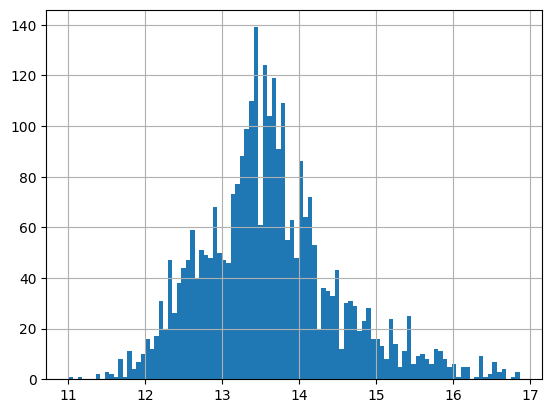

In [22]:
df_proccessed['PRICE_LOG'].hist(bins=100)

In [23]:
#lim_1 = df_proccessed["PRICE_LOG"].quantile(.33)
#lim_2 = df_proccessed["PRICE_LOG"].quantile(.66)
lim_1 = 13
lim_2 = 14.5
df_proccessed['PRICE_CATEGORY'] = pd.cut(df_proccessed['PRICE_LOG'], bins=[-float('inf'), lim_1, lim_2, float('inf')], labels=['Cheap', 'Mid', 'Expensive'])
df_proccessed.head(10)


,BEDS,BATH,SQFT_LOG,ZIPCODE,SUBLOCALITY,BROKERTITLE,TYPE,PRICE_LOG,LATITUDE,LONGITUDE,PRICE_CATEGORY
0,3,1.0,3.339294,10021,New York,Corcoran West Side,Co-op for sale,12.936036,40.767820,-73.959425,Cheap
1,2,2.0,2.956168,11374,Queens County,EXP Realty,Condo for sale,13.422469,40.732471,-73.867080,Mid
2,3,2.0,3.229426,10305,Richmond County,Momentum Real Estate LLC,Multi-family home for sale,13.652993,40.587072,-74.094436,Mid
3,2,1.0,3.339294,10025,New York,COMPASS,Co-op for sale,13.623140,40.799157,-73.969032,Mid
4,3,1.0,2.698970,10034,New York,New Heights Realty,Co-op for sale,12.425212,40.871796,-73.916064,Cheap
5,6,3.0,3.339294,11413,Queens County,Keller Williams Legendary,Multi-family home for sale,15.176487,40.663241,-73.762529,Expensive
6,2,1.0,2.977724,11223,Brooklyn,eXp Realty BKNY,Co-op for sale,12.703816,40.591141,-73.967677,Cheap
7,2,2.0,2.954243,11372,Queens,Other,Co-op for sale,12.506181,40.756279,-73.875805,Cheap
8,4,4.0,3.533009,11231,Kings County,COMPASS,Townhouse for sale,15.200554,40.685709,-74.003264,Expensive
9,3,1.0,3.339294,10014,New York,COMPASS,Co-op for sale,13.586099,40.734599,-74.007273,Mid


In [24]:
df_proccessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036 entries, 0 to 3035
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   BEDS            3036 non-null   int64   
 1   BATH            3036 non-null   float64 
 2   SQFT_LOG        3036 non-null   float64 
 3   ZIPCODE         3036 non-null   object  
 4   SUBLOCALITY     3036 non-null   object  
 5   BROKERTITLE     3036 non-null   object  
 6   TYPE            3036 non-null   object  
 7   PRICE_LOG       3036 non-null   float64 
 8   LATITUDE        3036 non-null   float64 
 9   LONGITUDE       3036 non-null   float64 
 10  PRICE_CATEGORY  3036 non-null   category
dtypes: category(1), float64(5), int64(1), object(4)
memory usage: 240.4+ KB


In [38]:
df_proccessed.drop(columns=["PRICE_LOG"], axis= 1, inplace=True)
df_proccessed.to_csv("C:/PW/Semestr 4/ML/Projekt 1/data/proccessed_data.csv", index=False)

Podział na zbiór do nauki i docelowy

In [26]:
X = df_proccessed.drop(["PRICE_CATEGORY", ], axis=1)
y = df_proccessed["PRICE_CATEGORY"]

Encodowanie zmiennych kategorycznych i standaryzacja long i lat

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
label = LabelEncoder()

y = label.fit_transform(y)

In [28]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols='ZIPCODE')
X['ZIPCODE'] = encoder.fit_transform(X['ZIPCODE'], y)
encoder = ce.TargetEncoder(cols='BROKERTITLE')
X['BROKERTITLE'] = encoder.fit_transform(X['BROKERTITLE'], y)

In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler


to_encode = [ "SUBLOCALITY",  "TYPE"]
to_scale = [  'LATITUDE', 'LONGITUDE']
standard = StandardScaler()
onehot_encoder = OneHotEncoder()

column_transformer = ColumnTransformer([('onehot_encoder', onehot_encoder, to_encode),('standard', StandardScaler(), to_scale)], remainder='passthrough')

X_encoded = column_transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state= 42)

## Proste modele

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [31]:
model = LogisticRegression()
model.fit(X=X_train, y= y_train)
y_predicted = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)
class_report = classification_report(y_test, y_predicted)
print(class_report)

0.8256578947368421
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       146
           1       0.80      0.74      0.77       102
           2       0.84      0.89      0.86       360

    accuracy                           0.83       608
   macro avg       0.82      0.79      0.80       608
weighted avg       0.82      0.83      0.82       608



In [32]:
model2 = DecisionTreeClassifier()
model2.fit(X=X_train, y= y_train)
y_predicted2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_predicted2)
display(accuracy2)
class_report2 = classification_report(y_test, y_predicted2)
print(class_report2)

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       102
           2       1.00      1.00      1.00       360

    accuracy                           1.00       608
   macro avg       1.00      1.00      1.00       608
weighted avg       1.00      1.00      1.00       608



In [33]:
model3 = GradientBoostingClassifier()
model3.fit(X=X_train, y= y_train)
y_predicted3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_predicted3)
display(accuracy3)
class_report3 = classification_report(y_test, y_predicted3)
print(class_report3)

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       102
           2       1.00      1.00      1.00       360

    accuracy                           1.00       608
   macro avg       1.00      1.00      1.00       608
weighted avg       1.00      1.00      1.00       608



In [34]:
model4 = SVC()
model4.fit(X=X_train, y= y_train)
y_predicted4 = model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_predicted4)
display(accuracy4)
class_report4 = classification_report(y_test, y_predicted4)
print(class_report4)

0.9111842105263158

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       146
           1       1.00      0.74      0.85       102
           2       0.88      0.98      0.93       360

    accuracy                           0.91       608
   macro avg       0.94      0.86      0.89       608
weighted avg       0.92      0.91      0.91       608



In [35]:
model5 = KNeighborsClassifier()
model5.fit(X=X_train, y= y_train)
y_predicted5 = model5.predict(X_test)
accuracy5 = accuracy_score(y_test, y_predicted5)
display(accuracy5)
class_report5 = classification_report(y_test, y_predicted5)
print(class_report5)

0.9046052631578947

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       146
           1       0.94      0.80      0.87       102
           2       0.89      0.96      0.92       360

    accuracy                           0.90       608
   macro avg       0.92      0.87      0.89       608
weighted avg       0.91      0.90      0.90       608



In [36]:
model6 = RandomForestClassifier()
model6.fit(X=X_train, y= y_train)
y_predicted6 = model6.predict(X_test)
accuracy6 = accuracy_score(y_test, y_predicted6)
display(accuracy6)
class_report6 = classification_report(y_test, y_predicted6)
print(class_report6)

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       102
           2       1.00      1.00      1.00       360

    accuracy                           1.00       608
   macro avg       1.00      1.00      1.00       608
weighted avg       1.00      1.00      1.00       608

